Includes Bisection and Newton-Rhapson root finding methods 

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d
import random as rn

## Bisection method
- Given interval [a,b], and a specified accuracy epsilon, determines root of the equation f(x) = 0

In [1]:
# Change this to whatever function you wish to use
def func(x):
    y = x**2 + (x-2)**3 - 4
    return y

In [3]:
def mybisection(a,b,eps):
    iterno = 0
    
    while abs(a-b)>eps: # while difference smaller than error
        iterno +=1
    
        xm = (a + b) / 2 # midpoint
        print("At x = {} y = {}".format(a,func(a)))
        print("At x = {} y = {}".format(xm,func(xm)))
        print("At x = {} y = {}".format(b,func(b)))
    
    # establish in which subinterval the solution lies
        # compute f(a) * f(xm)
        ff = func(a) * func(xm)
        if ff < 0: 
            # the solution lies in the left interval -  make xm the upper bracket
            print("Solution is in left interval")
            b = xm
        else:
            # the solution lies in the right interval -  make xm the lower bracket
            print("Solution is in right interval")
            a = xm
        print("-----------------")
            
    # the true solution is bracketed within the latest interval [a,b]
    # we can approximate it with the midpoint
    sol = (a + b) / 2
    
    return sol

##### Run Bisection method with custom params

At x = -4 y = -204
At x = 2.0 y = 0.0
At x = 8 y = 276
Solution is in right interval
-----------------
At x = 2.0 y = 0.0
At x = 5.0 y = 48.0
At x = 8 y = 276
Solution is in right interval
-----------------
At x = 5.0 y = 48.0
At x = 6.5 y = 129.375
At x = 8 y = 276
Solution is in right interval
-----------------
At x = 6.5 y = 129.375
At x = 7.25 y = 193.265625
At x = 8 y = 276
Solution is in right interval
-----------------
At x = 7.25 y = 193.265625
At x = 7.625 y = 232.119140625
At x = 8 y = 276
Solution is in right interval
-----------------
At x = 7.625 y = 232.119140625
At x = 7.8125 y = 253.411376953125
At x = 8 y = 276
Solution is in right interval
-----------------
At x = 7.8125 y = 253.411376953125
At x = 7.90625 y = 264.5411682128906
At x = 8 y = 276
Solution is in right interval
-----------------
solution is 7.953125


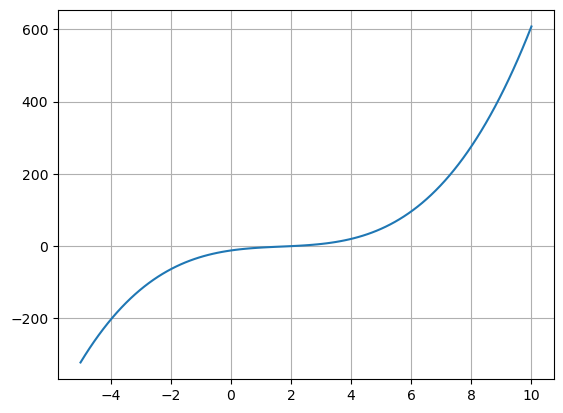

In [4]:
# Change x range
x = np.linspace(-5,10,100)
y = func(x)
pl.plot(x,y)
pl.grid()

# Change starting parameters
xl = -4
xu = 8
error = 0.1


sol = mybisection(xl,xu,error)
print("solution is {}".format(sol))

## 2.Bisection method with discrete function
- When f(x) is available in a discrete form use Lagrangian interpolation to find the root

In [5]:
def Lagrangian(j,xn,xp):
    n = len(xn) # number of nodes - so order of poly. is n-1
    
    L = 1 # intial value of polynomial
    
    for k in range(0,n):
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L

In [8]:
# evaluate f(x) at xp by knowing the points xn, yn
        
def funcint(xp,xn,yn):
    n = len(xn) - 1
    yp = 0
    # use Langrangian polynomial up to n, included
    for j in range(0,n+1):
        yp += yn[j] * Lagrangian(j,xn,xp)
    return yp

In [9]:
def mydiscretebisection(a,b,eps,xn,yn):
    iterno = 0
    
    while abs(a-b)>eps: # while difference smaller than error
        iterno +=1
    
        xm = (a + b) / 2 # midpoint
        print("Iteration no {}".format(iterno))
        print("At x = {} y = {}".format(a,func(a)))
        print("At x = {} y = {}".format(xm,func(xm)))
        print("At x = {} y = {}".format(b,func(b)))
    
    # establish in which subinterval the solution lies
        # compute f(a) * f(xm)
        ff = funcint(a,xn,yn) * funcint(xm,xn,yn)
        if ff < 0: 
            # the solution lies in the left interval -  make xm the upper bracket
            print("Solution is in left interval")
            b = xm
        else:
            # the solution lies in the right interval -  make xm the lower bracket
            print("Solution is in right interval")
            a = xm
        print("-----------------")
            
    # the true solution is bracketed within the latest interval [a,b]
    # we can approximate it with the midpoint
    sol = (a + b) / 2
    
    return sol

##### Test function

Iteration no 1
At x = -5 y = -322
At x = 1.5 y = -1.875
At x = 8 y = 276
Solution is in right interval
-----------------
Iteration no 2
At x = 1.5 y = -1.875
At x = 4.75 y = 39.359375
At x = 8 y = 276
Solution is in left interval
-----------------
Iteration no 3
At x = 1.5 y = -1.875
At x = 3.125 y = 7.189453125
At x = 4.75 y = 39.359375
Solution is in left interval
-----------------
Iteration no 4
At x = 1.5 y = -1.875
At x = 2.3125 y = 1.378173828125
At x = 3.125 y = 7.189453125
Solution is in left interval
-----------------
Iteration no 5
At x = 1.5 y = -1.875
At x = 1.90625 y = -0.367034912109375
At x = 2.3125 y = 1.378173828125
Solution is in right interval
-----------------
Iteration no 6
At x = 1.90625 y = -0.367034912109375
At x = 2.109375 y = 0.4507713317871094
At x = 2.3125 y = 1.378173828125
Solution is in left interval
-----------------
Iteration no 7
At x = 1.90625 y = -0.367034912109375
At x = 2.0078125 y = 0.0313115119934082
At x = 2.109375 y = 0.4507713317871094
Solutio

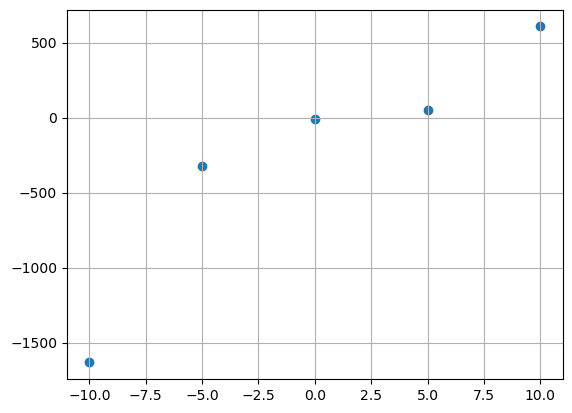

In [11]:
# read the files
f = open('x.txt','r')
v = f.readlines()
xn = np.ndarray(len(v))
i = 0
for value in v:
    xn[i] = float(v[i])
    i += 1
f.close()
f = open('fx.txt','r')
v = f.readlines()
yn = np.ndarray(len(v))
i = 0
for value in v:
    yn[i] = float(v[i])
    i += 1
f.close()
# plot the values



pl.scatter(xn,yn)
pl.grid()


sol = mydiscretebisection(-5,8,0.001,xn,yn)
print(sol)


In [12]:
# interim: making the set of values for Task B
x = np.linspace(-10,10,5)
y = x**2 + (x-2)**3 - 4

f = open('x.txt','w')
for value in x:
    f.write(str(value)+'\n')
f.close()
f = open('fx.txt','w')
for value in y:
    f.write(str(value)+'\n')
f.close()

 ## 3.Newton-Raphson method 

In [9]:
def func(x):
    y = x**2 + (x-2)**3 - 4
    return y

# Newton-Raphson method
def myNewton(x0,eps,dx):
    xn = x0
    xp = 10 * xn
    iterno = 0
    while abs(xn-xp)>eps:
        iterno +=1
        print("Iteration no {}".format(iterno))
        xp = xn
        fxn = func(xn)
        fxndx = func(xn+dx)
        dfxn = (fxndx - fxn)/dx
        xn = xp - fxn/dfxn
        print("Xp = {}, fx = {}, dfx = {} ".format(xp,fxn,dfxn))
        print("new point xn = {}".format(xn))
        print("-----------------")
        
    return xn



In [32]:
xi = 1
e = 0.01
dx = 0.1

sol = myNewton(xi,e,dx)
print(sol)

Iteration no 1
Xp = 1, fx = -4, dfx = 4.810000000000003 
new point xn = 1.8316008316008312
-----------------
Iteration no 2
Xp = 1.8316008316008312, fx = -0.6500139044344868, dfx = 3.807756752434508 
new point xn = 2.0023086647676682
-----------------
Iteration no 3
Xp = 2.0023086647676682, fx = 0.009240001308711498, dfx = 4.115325918764663 
new point xn = 2.000063398781181
-----------------
2.000063398781181


# Task D Newton Rhapson Non Linear Eqn

In [55]:
#DEFINE functions
u = lambda x,y: x**2 +1 -y
v = lambda x,y: 2* mt.cos(x) - y

In [60]:
#DEFINE derivatives
dux = lambda x,y: 9
duy = lambda x,y: 1

dvx = lambda x,y: 1
dvy = lambda x,y: 1

In [61]:
#DEFINE starting points
xn0 = 1
yn0 = 5
e = 0.1

In [64]:
def newtoneqn(xn0,yn0,e):
    
    iterno = 0
    condition = True
    
    while (condition):
        iterno += 1
        
        xn1 = xn0 - (dvy(xn0,yn0) * u(xn0,yn0) - duy(xn0,yn0) * v(xn0,yn0)) / ( (dux(xn0,yn0)*dvy(xn0,yn0)) - (duy(xn0,yn0) * dvx(xn0,yn0)))
        yn1 = yn0 - (-dvx(xn0,yn0) * u(xn0,yn0) + dux(xn0,yn0) * v(xn0,yn0)) / ( (dux(xn0,yn0)*dvy(xn0,yn0)) - (duy(xn0,yn0) * dvx(xn0,yn0)))
        
        condition = ((abs(xn1-xn0) >= e) and  (abs(yn1-yn0) > e))
        print("Iteration : {} x = {}, y = {} ".format(iterno,xn1,yn1))
        xn0 = xn1
        yn0 = yn1


In [65]:
newtoneqn(xn0,yn0,e)

Iteration : 1 x = 0.8850755764670349, y = 9.034319811796685 
Iteration : 2 x = 0.8204634819395646, y = 16.866789698282147 
